In [1]:
# Indivíduo modelo

coeffs={
    'A': {
        'E': {'n': 10.237611316210982, 'k': 0.653464971462323, '-': True}, 
        'tau': 1.5398906533829366
        }, 
    'B': {
        'A': {'n': 6.701514577177078, 'k': 0.5321271271145982, '-': False}, 
        'tau': 2.099943026899326
        }, 
    'C': {
        'B': {'n': 2.70642030360658, 'k': 0.3643670348885463, '-': False}, 
        'tau': 1.5768281296688946
        }, 
    'D': {
        'C': {'n': 5.594897802097363, 'k': 0.5587273348199578, '-': False}, 
        'tau': 2.5506006896094817
        }, 
    'E': {
        'D': {'n': 3.476175653127073, 'k': 0.10166946225443736, '-': False}, 
        'B': {'n': 5.959333815247865, 'k': 0.67850151262851, '-': False}, 
        'E': {'n': 5.171520427553738, 'k': 0.8728202085546947, '-': False}, 
        'tau': 2.9575298232470577
        }
    }

c:\Users\anabi\OneDrive\Documentos\# BOLSA GRN\Códigos\BOLSA-GRN\PythonCode\Modules\Helpers.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['t'] + labels)


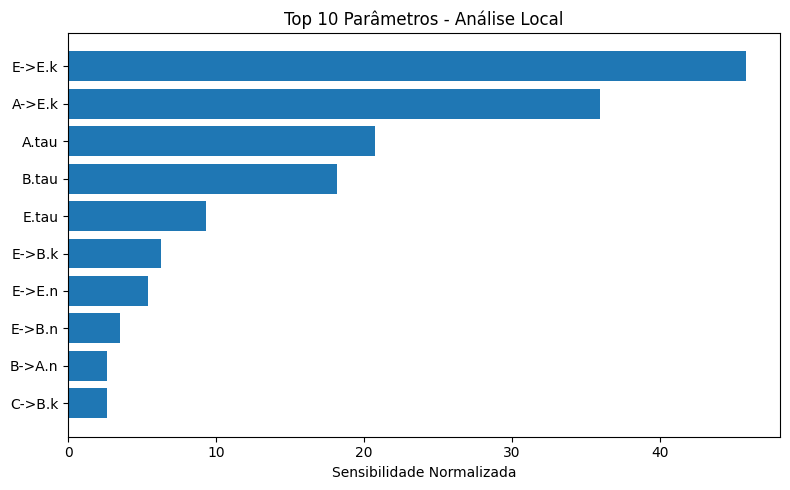

[INFO] Executando análise de Morris com 300 amostras...


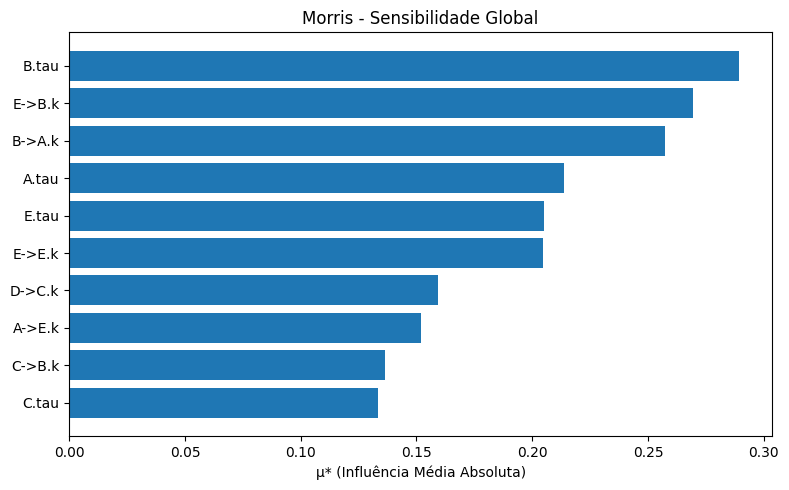

[INFO] Gerando 19 parâmetros e 8 amostras (second_order=True)...
[INFO] Calculando índices de Sobol...

=== Resultados da Análise de Sobol ===
A->E.n                    | S1=0.0005 | ST=0.0024
A->E.k                    | S1=0.4113 | ST=0.3112
A.tau                     | S1=0.4917 | ST=0.3750
B->A.n                    | S1=0.0941 | ST=0.0182
B->A.k                    | S1=0.1898 | ST=0.1776
B.tau                     | S1=-0.2749 | ST=0.2518
C->B.n                    | S1=-0.0259 | ST=0.0008
C->B.k                    | S1=-0.0770 | ST=0.0261
C.tau                     | S1=0.1081 | ST=0.0190
D->C.n                    | S1=-0.0028 | ST=0.0002
D->C.k                    | S1=0.3997 | ST=0.3169
D.tau                     | S1=0.0419 | ST=0.0018
E->D.n                    | S1=0.0229 | ST=0.0013
E->D.k                    | S1=0.0248 | ST=0.0037
E->B.n                    | S1=-0.0590 | ST=0.0079
E->B.k                    | S1=0.0810 | ST=0.3263
E->E.n                    | S1=0.3559 | ST=0.2164
E-

C:\Users\anabi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


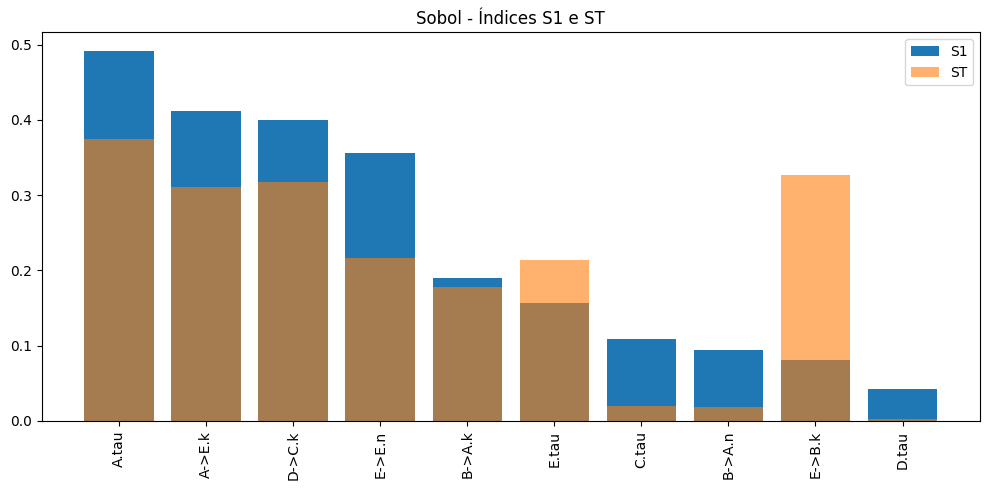

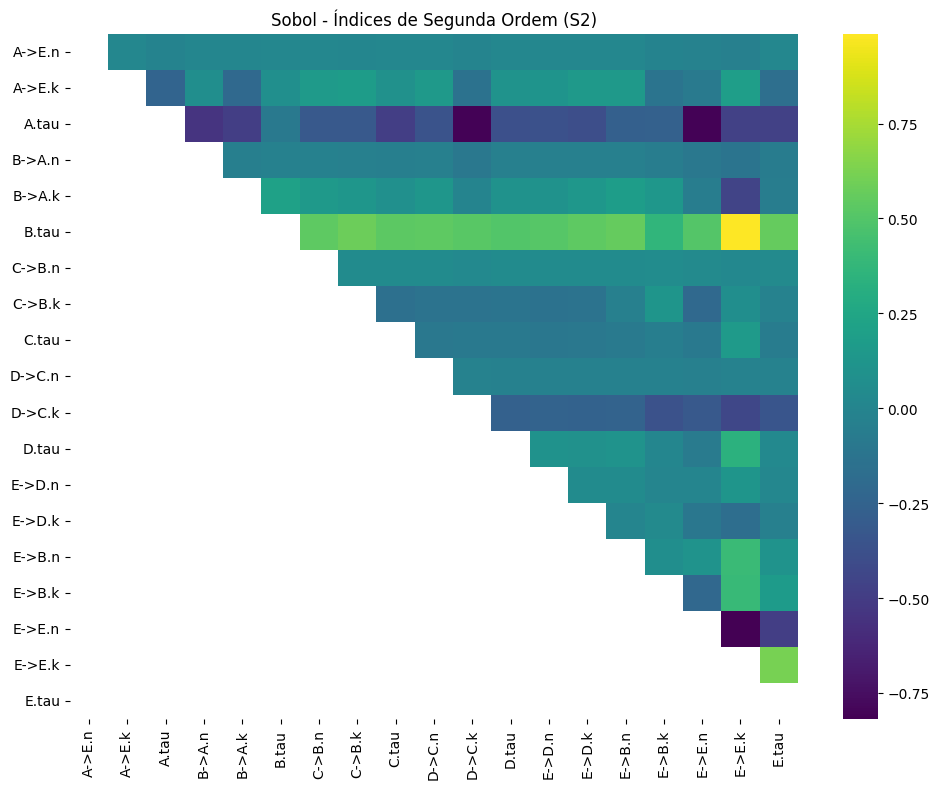

In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../..")) 

from Modules.Models import ModelWrapper
from Modules.Sensitivity import SensitivityAnalyzer

model = ModelWrapper.GRN5()
analyzer = SensitivityAnalyzer(model)
best_params = coeffs

# Análise local
local_results = analyzer.local_sensitivity(best_params)
analyzer.plot_local(local_results)

# Aanálise de Morris
morris_results = analyzer.morris_sensitivity(best_params, num_trajectories=15)
analyzer.plot_global(morris_results, method="morris")

# Análise de Sobol
sobol_results = analyzer.sobol_sensitivity(best_params, N=2048, second_order=True)
problem = analyzer._build_problem(best_params)
analyzer.plot_global(sobol_results, method="sobol")

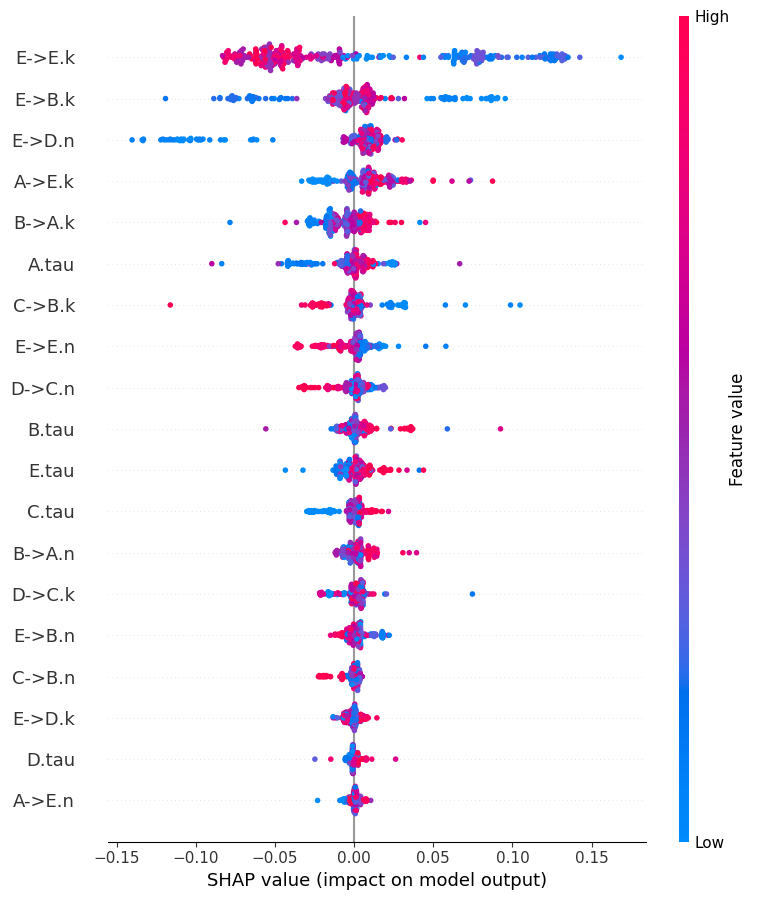

In [ ]:
# SHAP – Análise de Importância Global
shap_values = analyzer.shap_sensitivity(best_params, N=64)
analyzer.plot_shap_summary()


In [4]:
# import sys
# import os
# sys.path.append(os.path.abspath("../..")) 

# from Modules.Models import ModelWrapper
# from Modules.Sensitivity import SensitivityAnalyzer

# model = ModelWrapper.GRN5()
# analyzer = SensitivityAnalyzer(model)
# best_params = coeffs


# shap_values = analyzer.shap_sensitivity(best_params, N=8)
# shap_values.shape